In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings("ignore")

## to ignore this warning:
## /anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
## FutureWarning)

In [3]:
iris_df = pd.read_csv('../datasets/iris.csv', 
                       skiprows=1, 
                       names = ['sepal-length',
                                'sepal-width',
                                'petal-length',
                                'petal-width',
                                'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.6,2.9,4.6,1.3,Iris-versicolor
1,5.7,2.5,5.0,2.0,Iris-virginica
2,5.1,3.5,1.4,0.2,Iris-setosa
3,6.7,3.0,5.2,2.3,Iris-virginica
4,5.4,3.4,1.7,0.2,Iris-setosa


In [5]:
iris_df.shape

(150, 5)

In [6]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.6,2.9,4.6,1.3,1
1,5.7,2.5,5.0,2.0,2
2,5.1,3.5,1.4,0.2,0
3,6.7,3.0,5.2,2.3,2
4,5.4,3.4,1.7,0.2,0


In [7]:
iris_features = iris_df.drop('class', axis=1)

iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.6,2.9,4.6,1.3
1,5.7,2.5,5.0,2.0
2,5.1,3.5,1.4,0.2
3,6.7,3.0,5.2,2.3
4,5.4,3.4,1.7,0.2


In [8]:
iris_labels = iris_df['class']

iris_labels.sample(5)

33    0
58    0
95    2
47    1
20    0
Name: class, dtype: int32

In [9]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette') #for creating table like O/P
    print(50 * '-') # for printing ---------------------------
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

In [10]:
def k_means(data, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [11]:
build_model(k_means, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.736	0.747	0.742	0.716	0.733	0.551


### Agglomerative Clustering

Agglomerative clustering, as you know, is bottom-up hierarchical clustering where you build a tree representation of your data points and then merge data points that are close to one another. While performing agglomerative clustering, every step in the clustering model merges two clusters nearest to each other. 


Now, this brings up a number of questions. What is the metric used to determine the nearness of two data points? How is nearness measured? What is the strategy you use to determine which two points are close to one another? 


The strategy that you'll use to measure nearness is what determines how clusters are merged together. Now it turns out that for each of these questions there are several different approaches that are possible. Let's consider the first of these two questions, what is the metric for nearness? 


When you use scikit-learn's estimator API, there are four different distance measure that you can specify. 


- The first of these is Euclidean distance, also known as L2 distance. This is the square root of the sum of the squares of the distances between two points. 


- Another distance measure that you can specify is the L1 distance, also known as Manhattan distance or taxicab distance. This is the sum of the absolute differences between the coordinates of the two data points. 


- Another commonly used distance measure is the cosine distance. This is the cosine of the angle of the two feature vectors represented by those data points. 


- And finally, we can have a precomputed matrix representing the distance measures between points. 


Once we've specified the distance measures, the next step is to determine how is this nearness measured? How do we say that two clusters are close to one another and should be merged? You'll choose two clusters to merge together when you minimize the distance between the clusters. And this linkage criterion determines the distance that you want minimized when you are merging clusters. And there are different kinds of linkage criterion that you can specify when you use agglomerative clustering. 


The four linkage criterion supported by scikit-learn's estimator API are single, complete, average, and the ward linkage criterion. 


- The single linkage criterion uses the minimum of the distances between all observations in the two clusters as the distance between two clusters. Two clusters which have the lowest value of this minimum distance are the clusters that are merged together. 


- Another term for complete linkage is also maximum linkage. This uses the maximum distances between all observations in the two clusters. At every agglomerative step, when we try to merge together clusters we will try to find those two clusters which have a minimum value of this maximum distance. 


- The average linkage criterion uses the average of the distances of each of the observations in the two clusters. The two clusters which have a minimum value of this average distance will be merged together.


- And finally, we have the ward linkage criterion. This is the default linkage criterion used by the scikit-learn estimator API. This minimizes the variances of the data points in the two clusters.


In [12]:
def agglomerative_fn(data,n_clusters=3):
    model = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    
    return model

Here is the clustering model function that we defined for agglomerative clustering. 


The bottom-up approach which recursively merges pairs of clusters, starting with clusters which contain just a single point. 


At every iteration, when we choose clusters to merge we try to minimally increase the linkage distance between pairs of clusters. And the default linkage distance for this estimator API is ward. This is what minimizes the variances of the data points across two clusters. 


This function instantiates the agglomerative clustering estimator API and calls fit on the iris dataset. 


We can now implement agglomerative clustering by calling build_model and passing in this agglomerative function. 

Iris_features are the features of the data that we want to cluster. And the iris_labels will allow us to evaluate our clustering once it's complete. 

In [13]:
build_model(agglomerative_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.758	0.554


And here are the different scores from agglomerative clustering on the iris dataset. For this particular dataset, agglomerative clustering did about the same as k-means clustering earlier.

### DB SCAN

- stands for “density based spatial clustering of applications with noise”

- does not require the user to set the number of clusters a priori

- can capture clusters of complex shapes

- can identify points that are not part of any cluster (very useful as outliers detector)

- is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

- works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space)

- Points that are within a dense region are called core samples (or core points)




We've seen earlier that when you have a large dataset and you want to partition them into a moderate number of clusters you might consider k-means or DBSCAN clustering. 

The k-means algorithm works well when you want your cluster sizes to be fairly even. Every cluster will have a similar number of data points. And your data is in the form of a flat surface. 

DBSCAN is a density- based clustering algorithm as opposed to the centroid-based k-means, which means the clusters found by DBSCAN will focus on areas where there is a high density of data points. 


Clusters can be of any shape and can be uneven in size. As you might have guessed, DBSCAN is an algorithm. It stands for density-based spatial clustering of applications with noise. 


In your dataset, DBSCAN tries to find areas or regions which have a high density of points, points that are closely packed together. 


High density regions usually have lower density or sparse regions separating them from other high-density regions. 


If there are sparse areas with just a few points these are marked as outliers. 


DBSCAN works well with noisy data and outliers, but it's not as good as the BIRCH algorithm .


When configuring your DBSCAN clustering algorithm, there are two main parameters that you need to consider and specify. 


- The first is eps. This represents the minimum distance. Points that lie closer than this minimum distance are considered neighbors.


- The second parameter that we specify to the DBSCAN algorithm is min_samples. This is the minimum number of points which are required to form a dense region. 


What is the right specification for these two parameters? Well, it depends on what you want to cluster your dataset. And there are a few tradeoffs involved. And this is what we'll discuss now. 


-- Let's consider the eps first, the minimum distance specification for two points to be considered neighbors. Now, if we pick too small a value most of the data will not be clustered. Especially if you're working with data of very high dimensionality, you might find that points are often far away from one another. 

-- And if you have too low a value of minimum distance a large number of points will remain unclustered. And all of these unclustered points will be considered noise or outliers in your data, which may not be what you want. 

-- At the other extreme, if you end up choosing too large a value for this minimum distance, clustering will be very, very coarse. It may not be granular enough for your needs. Most of the points might end up in the same cluster. You might have just one region of very high density. 

A single cluster will not really give you the right kind of information about the underlying data. What is the right value of eps for your dataset? 


Well, that's what hyperparameter tuning is for. Let's move on to the other parameter, min_samples, and see what we need to consider here. 


Now, generally this should be greater than the number of dimensions or features in the data. If the exploratory analysis that you have performed has shown you that your dataset is fairly noisy, you might want to choose a large value for min_samples. This is better for noisy data and will result in the formation of significant clusters.

- If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample

- core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

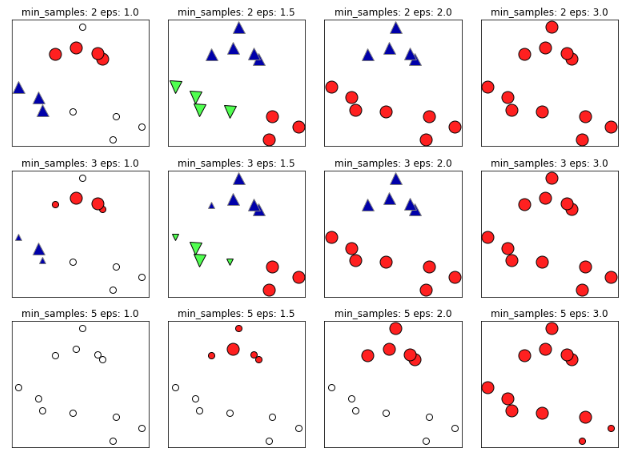

We set up a function called dbscan_fn to perform DBSCAN clustering. 

In [14]:
def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps,min_samples=min_samples).fit(data)
    
    return model

DBSCAN is a density-based clustering algorithm that tries to find regions of high density. It groups points that are close to each other based on a distance measure and a minimum number of points. 

Observe that we pass in an eps parameter to the estimator object. All points within this maximum distance are considered neighbors. Remember, this is the value that determines what we consider a dense region. If we want to mark only very dense regions we should prefer smaller values. Because we have just four features in the iris dataset, we can choose a very small value here. For datasets of higher dimensionality, the values should be larger.


We'll also pass in the input argument min_samples, the minimum number of samples in the neighborhood for a region to be considered a dense region. We've chosen this value to be 4 for our dataset. 

In [15]:
build_model(dbscan_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.569	0.372


And you can see from the resulting scores of our model that this model really didn't do that well. It's possible that the input parameters we chose weren't correct. Maybe a little tweaking of this model can give us better results, but overall this is not a great model compared to k-means clustering or agglomerative clustering.

### MEAN-SHIFT CLUSTERING

 take one particular point and define a neighborhood for each point. And perform this action for all of the points here within your dataset. Each point in your dataset will have its own neighborhood. For every point in your dataset, apply some kind of function to all of the neighboring points and calculate the result of this function,

This function is called a kernel. And mean-shift clustering can work with different kinds of kernels. Remember that this is a function calculated for each point based on all points in its neighborhood. 


A flat function can be as simple as the sum of all points in the neighborhood of a particular point where every point in the neighborhood is associated with the same weight. In a flat kernel, all neighboring points have equal significance. No one point is more important than the other. 


Instead of a flat kernel, you can have a kernel that's a little more interesting. For example, you can have a Gaussian RBF kernel, which is a probability-weighted sum of points. This RBF, or radial basis function kernel, is a commonly used kernel function for several ML algorithms. 


So for every point you can apply this function to all of the neighborhood points, which is a probability-weighted sum of points. But what is the probability distribution that you would choose? Well, a common choice would be the Gaussian probability distribution. 


The Gaussian probability distribution is the normally distributed bell curve that we are familiar with. It has a mean represented by mu and a standard deviation represented by sigma.


When we apply the Gaussian RBF kernel to every point in our dataset the mean mu is the center point. This is the point to which we apply this function. The standard deviation of this Gaussian RBF kernel, or sigma, is referred to as the bandwidth of the kernel. And this bandwidth is a hyperparameter for the mean-shift clustering algorithm. 


The standard deviation, or bandwidth, of this kernel is something that you can specify when you instantiate the estimator object for this clustering. Now that we've understood this kernel function, what does mean-shift clustering do? 


This kernel function is applied to each point. So consider every point in your dataset and apply this Gaussian RBF kernel where the standard deviation is a hyperparameter that you specify and the mean is that data point itself. 


After you've applied the kernel function to each point, assume that all of these points here are color-coded by the magnitude of the RBF kernel that you've just applied. Now you can see that there are certain points here that are darker than others. High values of the RBF kernels are peaks here in this dataset. Points which have low values for this RBF kernel are troughs here in this dataset. Now is where we apply mean shift. Now let's start by shifting all of these points towards the nearest peak. This means that the lighter-colored points will start moving towards the RBF peaks, which are the darker-colored points. You'll recalculate the kernel function and move these points. And this process is called the mean shift. This algorithm converges when all of the points stop moving and a few peaks have been found. These are your clusters. The only hyperparameter or design parameter that you can specify for this mean-shift clustering algorithm is the bandwidth, or the standard deviation of your kernel. 



If you specify low values for sigma, that is the standard deviation, your kernel is tall and skinny with a shape like you see on screen. 



This means you want to ignore those points that are far from the mean. You want to consider a smaller neighborhood. 


On the other hand, if you specify a large value for sigma you get a flatter, broader kernel. Here, you'll take into account points which are far from the mean as well. The neighborhood is larger. 



Before we head off into the implementation of mean-shift clustering, let's compare and contrast k-means clustering with mean-shift clustering. 


With k-means clustering, we have to specify the number of clusters into which we want to group the underlying data up front. 


With mean-shift clustering, there is no need to specify the number of clusters up front. 


You'll find that when you work with real- world data k-means clustering will be unable to handle some complex non-linear data. 


Whereas you might find that the kernel function that you use with mean-shift clustering can handle even complex, non-linear data, for example pixels in an image. With k-means clustering, the number of clusters is the main hyperparameter, and there is very less hyperparameter tuning needed. Whereas with mean-shift clustering the bandwidth parameter is super important and it's hard to know up front what bandwidth will give you good clustering. 


So hyperparameter tuning is very important.


K-means clustering, you'll find, is fast, performant, and intuitive. It's computationally less intensive than mean-shift clustering, which is computationally very intensive. You have to calculate the kernel for every data point. 


When you run k-means clustering, you'll find that its complexity is order of N where N is the number of data points. 


For mean-shift clustering, the complexity is order of N squared, so much larger. One advantage of mean-shift clustering over k-means clustering is how it deals with outliers. 


K-means clustering doesn't really do well. It struggles with outliers. Whereas, mean-shift clustering is far better. 

we can implement mean-shift clustering using the scikit-learn estimator API. 

Create a function mean_shift_fn, which instantiates the mean-shift clustering estimator objects and fits on the iris features data. Mean-shift clustering will try to discover blobs in a smooth cluster of data points. 


Under the hood, this algorithm will try to discover original seeds from where it will start its work. The original seeds of the cluster are determined using a binning technique. 



In [16]:
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

The bandwidth of our kernel is a hyperparameter that you've specified. Zero point eight five is the parameter I've chosen for the iris features. Let's go ahead and apply mean-shift clustering by invoking the build_model functions on our iris features. 

In [17]:
build_model(mean_shift_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.757	0.551


And here are the scores from this clustering algorithm. All of the scores here in this dataset, including the silhouette score, are very similar to the scores that we obtained using k-means clustering, Maybe a little better.

If you have a large dataset that has to be clustered into many different clusters BIRCH is one of the algorithms that you would pick. BIRCH is an acronym, which means it's typically written in all uppercase. But because it's also a word, it's commonly written with only the first letter capitalized. So the first principle to apply while choosing BIRCH or agglomerative filtering is that you have a large dataset which you want to cluster into many different groups. BIRCH has one major advantage that it has the ability to detect and remove outliers in your data. 


Another significant feature of the BIRCH clustering algorithm is that it has the ability to incrementally process incoming data in the form of a stream and update clusters based on new incoming data points. This makes BIRCH an online clustering algorithm. 


BIRCH stands for balanced iterative reducing and clustering using hierarchies. Now this should tell you that BIRCH is a hierarchical clustering algorithm just like agglomerative clustering. 


BIRCH builds a tree representation of your data behind the scenes and tries to merge together data points into clusters using this tree. If you know that your dataset is noisy and you have incoming streams where there might be a lot of outlier data, you would choose to go with BIRCH clustering. 


In addition, BIRCH is extremely time and memory efficient. If you have a very large dataset that does not fit in main memory, it's present on disk somewhere, and you have to read it in in subsets, BIRCH is the algorithm for you. 


Even if you have a limited amount of main memory available, BIRCH makes full use of the available memory to derive the best possible sub clusters while minimizing input/output costs while reading from disk. 


In most cases, BIRCH only requires a single scan of the underlying database. BIRCH also works very well if not all of the data points are available up front. BIRCH is able to incrementally cluster incoming data points. It'll update the existing clusters as new data arrives, and it takes them into account. This is an online learning algorithm. 


One disadvantage of BIRCH is that it doesn't work very well if your input data is of a very high dimensionality. And we've seen that when using scikit-learn understanding the algorithm is more difficult than actually applying the algorithm using the estimator API. 


BIRCH is very time and memory efficient and can work with streaming data. 


Here, we just instantiate the BIRCH estimator object, specify the number of clusters, and call fit on the iris dataset. 

In [16]:
def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model

Let's use the build_model function to perform BIRCH clustering. 

In [17]:
build_model(birch_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.778	0.804	0.791	0.732	0.775	0.554


And from the results of the evaluation scores you'll find that this clustering did significantly better than the other clustering models that we've seen so far. The homogeneity and completeness calls are closer to .8 as compared with k-means and agglomerative clustering.

### Affinilty Propagation Clustering

Affinity propagation clustering does not scale to very large datasets. So if you have a small dataset which you want to partition to many clusters, affinity propagation is a choice that you might make. 


So you would choose either mean-shift clustering, which is computationally intensive, or affinity propagation when you have a small dataset that you want to partition into many clusters. 


The advantage of both of these algorithms is the fact that they work well even when the cluster sizes are uneven, all of the clusters don't contain the same number of data points, or when your data is in the form of a complex shape, a manifold shape. 


Affinity propagation clustering has one major advantage over other kinds of clustering. It does not need the number of clusters to be specified up front. So if your dataset is completely unknown and unlabeled and visualization hasn't really shown you how many clusters is the right number, affinity propagation is for you. 


Affinity propagation makes no assumptions about the internal data of the points that it's supposed to cluster. It chooses the number of clusters based on the data provided.


Affinity propagation works by using graph distances. It constructs nearest-neighbors graphs under the hood and uses these graphs to see which points are close together and should belong to the same cluster. 


The clusters in a dataset found using affinity propagation are described using exemplars. Exemplars are identified as those data points that are most representative of other samples in the dataset.


Exemplars are points in your data that explain or represent other data points best. And they can be thought of as the most significant of their cluster. 


Under the hood, there is a graph of all of the data points and its nearest neighbors. All of the data points are nodes in this graph, and these connected nodes send messages to one another. The objective of these messages that are passed between data points is to find the exemplars for the clusters. 


Messages express the willingness of these points to be exemplars and whether it makes sense for those points to be exemplars. The willingness of a point to be an exemplar and whether that point as an exemplar makes sense are together considered in setting up the final exemplars for the clusters.

The algorithm continues iteratively until convergence, at which point the final exemplars are chosen and the final clustering is obtained. 


Let's set up a function which instantiates the affinity propagation estimator in scikit-learn. This is a clustering technique where we do not have to specify the number of clusters up front. All of the iris records that we pass in are data points, which will be nodes of a graph. And these points will pass messages to each other to find exemplars that represent a cluster. 

In [18]:
def affinity_propagation_fn(data, damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model

A hyperparameter for affinity propagation is this damping factor. This defines the extent to which the current value of a particular data point is maintained relative to incoming values and in some form is a learning rate for this affinity propagation algorithm. This learning rate defines whether a point continue with the current exemplar or updates to a new one. 

Invoke the build_model function to apply affinity propagation clustering to our iris features. 

In [19]:
build_model(affinity_propagation_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.851	0.492	0.623	0.437	0.480	0.349


And from the resulting scores, you can see that the homogeneity score is very, very high. The completeness score, on the other hand, is not that good. And all of the other scores are fairly low as well. 


<b>High homogeneity and low completeness essentially means that every cluster does contain members of the same class, but all members of a class do not lie in the same cluster. </b>


That is the reason for the low completeness score.

### Mini-batch K-means Clustering

Now, mini-batch k-means is exactly what its name suggests. We've seen in our matrix before that if you want a moderate number of clusters on a very large dataset the clustering algorithms that we'll choose to use are k-means and DBSCAN.


K-means is a general-purpose clustering algorithm that is very popular. It generates even cluster sizes and works with data which is in the form of a flat surface. 


K-means, as we have studied, is a centroid- based clustering algorithm. It tries to calculate reference vectors or centroids for clusters. And points which are close to the reference vectors belong to that cluster. The performance of k-means clustering in the form that we've studied so far where we operate on the entire dataset may not be great, which is why mini-batch k-means is so much better. 


The objective and implementation of mini-batch k-means is exactly the same as k-means clustering. However, we perform k-means on the entire dataset. In mini-batch k-means, we perform k-means on randomly sampled subsets of the data. These randomly sampled subsets are referred to as mini-batches. 


And working on mini-batches allow us to reduce the computation time of calculating the k-means. These mini-batches drastically reduce the amount of computation required to converge to a local solution, which means mini-batch k-means is far faster than full k-means. 


It has been found in practice that the tradeoff involved is generally acceptable. The performance of mini-batch k-means is only slightly worse than performing k-means on the entire dataset. 


Scikit-learn, of course, makes it very easy for you to implement mini-batch k-means. Here is a function which instantiates the mini-batch k-means estimator. This estimator object will take care of performing k-means clustering on subsets of the data on which we call fit rather than working on the entire dataset. 

In [23]:
def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model

You can see that the input arguments to mini-batch k-means is exactly the same as for k-means, number of clusters, maximum number of iterations. In addition, we specify a batch size, which in our case is 20. We'll now invoke this mini-batch k-means clustering by calling the build_model function and passing in the function that we just defined. 

In [24]:
build_model(mini_batch_kmeans_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.736	0.747	0.742	0.716	0.733	0.551


And let's take a look at the evaluation scores for how this algorithm performed. And you can compare this with k-means clustering. And you can see that all of the scores are very, very close. Performance of mini-batch k-means on the iris dataset was only very slightly worse than full k-means.

### Spectral Clustering Using a Precomputed Matrix

we'll understand and implement spectral clustering in scikit-learn using a precomputed similarity matrix. 


If you want to cluster your data into a few clusters and the size of your dataset is fairly small to medium sized, consider spectral clustering. 


Spectral clustering, behind the scenes, is fairly simple to implement. And the results that you get from spectral clustering are also intuitive, especially when you work with images. 


The cluster sizes that you get with spectral clustering are fairly even. 


In addition, spectral clustering also works with complex non-linear data. 
You can use spectral clustering for manifolds. 


Behind the scenes, spectral clustering sets up an affinity matrix using nearest neighbors, relying on the distances between points. If you pass in raw data, this affinity matrix will be computed for you. You can also pass in a pre-computed affinity matrix. 



The estimator object in scikit-learn, which performs spectral clustering, accepts raw data as well. And then behind the scenes it'll create an affinity matrix of the input data points. Instead of passing in raw data, if you have a precomputed affinity matrix or a similarity matrix you can pass that as an input as well to spectral clustering. Think of this precomputed affinity matrix as a graph which indicates how similar points are. 



Behind the scenes, spectral clustering will apply a mathematical technique called eigenvalue, or spectrum, decomposition to convert your data to a lower dimensional embedding. This is why spectral clustering works well with image data. 



And in fact, this technique is often used in image segmentation algorithms. 



Once your original features have been represented in lower dimensional space spectral clustering does a pairwise similarity measurement to form clusters. This is akin to applying k-means clustering on the lower dimensional data. 


In fact, the density-based clustering algorithm that we had studied earlier, DBSCAN, is a special case of spectral clustering in its implementation. 


K-means kernel clustering is also an example of a spectral clustering technique. As the name implies, k-means kernel clustering is a variation of the k-means algorithm. You'll first apply a mathematical technique called the kernel trick in order to transform the original data points. And then on this transformed data you implement the k-means clustering algorithm. 



For this, when we work with the spectral clustering estimator in scikit-learn we'll not feed it the raw data of iris features. 


Instead, we'll feed in a precomputed affinity or similarity matrix. We'll keep the similarity matrix fairly simple so that we understand it. 

In [31]:
from sklearn.cluster import SpectralClustering

In [32]:
SS = 1000 

In [33]:
IS = 10 

In [34]:
LS = 0.01

SS stands for self-similarity, the similarity of a data point with itself. It has a value of 1000. 

IS stands for intra-cluster similarity. This is the similarity that is present between points which belong to the same cluster. You can see that it's lower than self- similarity, but still a fairly high number of 10. 


And here is the number that we'll use for data points which have a very low similarity, LS = 0.01. This is the similarity that exists between points that might lie in different clusters. 


We'll now set up a very simple similarity matrix for just nine points in the dataset.

In [35]:
similarity_mat = [[SS, IS, IS, LS, LS, LS, LS, LS, LS],
                  [IS, SS, IS, LS, LS, LS, LS, LS, LS],
                  [IS, IS, SS, LS, LS, LS, LS, LS, LS],
                  [LS, LS, LS, SS, IS, IS, LS, LS, LS],
                  [LS, LS, LS, IS, SS, IS, LS, LS, LS],
                  [LS, LS, LS, IS, IS, SS, LS, LS, LS],
                  [LS, LS, LS, LS, LS, LS, SS, IS, IS],
                  [LS, LS, LS, LS, LS, LS, IS, SS, IS],
                  [LS, LS, LS, LS, LS, LS, IS, IS, SS]] 

You can see that this similarity matrix has exactly nine rows, one row corresponding to every data point in our dataset. This precomputed similarity matrix is a square matrix, and it also has nine columns, one column corresponding to every data point in our dataset. 


The individual values present within these matrix cells contain information about how similar a particular data point is to another data point. 


You can see that all of the values here along the main diagonal are equal to SS, which stands for self- similarity, which is equal to 1000. Data point 0 is, of course, exactly the same as data point 0. 


Self-similarity is very, very high. Let's now consider values only in the first column, which shows how similar data point 0 is to other data points. At column 0 row 0, we have SS, that is self-similarity. 


Data point 0 is, obviously, highly similar to itself. You can see at column 0 row 1 and 2 we have IS, which stands for intra-cluster similarity. 

As per our similarity matrix, points 0, 1, and 2 are in the same cluster. 


Observe the similarity of point 0 with all of the other points in our dataset, point 3 all the way through point 8. You can see that it's LS, that is low-similarity. 


With this information, you should be able to see a clear pattern in the similarity matrix. 

You can see that the first three points belong to the same cluster. The next three points belong to the same cluster, a different one.

And the last three points belong to another cluster, once again a different one. 


Using this precomputed similarity matrix, let's instantiate the spectral clustering estimator object. We want to cluster this data into three clusters. And the affinity here is precomputed. When you have a precomputed similarity matrix, as we do in this case, affinity should be set to precomputed. If you're working on raw data you can use the default value for affinity. The default value for affinity here is the RBF kernel. You can also have it be nearest neighbors. These are different techniques used to find the affinity matrix on raw data. 

In [36]:
spectral_model = SpectralClustering(n_clusters=3, affinity='precomputed').fit(similarity_mat)

Once we've called fit on the affinity or similarity matrix, let's take a look at the labels that spectral clustering has applied to our data points. 

In [37]:
spectral_model.labels_

array([2, 2, 2, 0, 0, 0, 1, 1, 1])

Well, our data, of course, was very simple so we could understand it. You can see that the first three points have been assigned to the same cluster with label 2. You can see that the next 3 points are assigned to a different cluster with label 0. And the last 3 points belong to a third cluster with label 1. Now in the real world, your precomputed affinity matrix may not be available or might be really complex, but the principles of applying spectral clustering remain the same. 